In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
# lets open the seoul bikesharing data 
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
x_df = seoul_bike_sharing_demand.data.features 
y_df = seoul_bike_sharing_demand.data.targets 
  
# variable information 
print(seoul_bike_sharing_demand.variables)
x_df.head()
y_df.head()

                     name     role         type demographic description  \
0                    Date  Feature         Date        None        None   
1       Rented Bike Count  Feature      Integer        None        None   
2                    Hour  Feature      Integer        None        None   
3             Temperature  Feature   Continuous        None        None   
4                Humidity  Feature      Integer        None        None   
5              Wind speed  Feature   Continuous        None        None   
6              Visibility  Feature      Integer        None        None   
7   Dew point temperature  Feature   Continuous        None        None   
8         Solar Radiation  Feature   Continuous        None        None   
9                Rainfall  Feature      Integer        None        None   
10               Snowfall  Feature      Integer        None        None   
11                Seasons  Feature  Categorical        None        None   
12                Holiday

,Functioning Day
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [12]:
# We're going to predict a parameter that
# the dataset creators classified as a feature
# lets do some data pre processing
label_encoder = LabelEncoder()
x_df['Seasons'] = label_encoder.fit_transform(x_df['Seasons'])
x_df['Holiday'] = label_encoder.fit_transform(x_df['Holiday'])
y = pd.Series(x_df['Rented Bike Count'])
y_df['Functioning Day'] = label_encoder.fit_transform(y_df['Functioning Day'])
subset_features = x_df[['Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
          'Rainfall','Snowfall', 'Seasons', 'Holiday', ]]
combined_df = pd.concat([subset_features, y_df['Functioning Day']], axis=1)
X = combined_df.values



C:\Users\passa\AppData\Local\Temp\ipykernel_31036\1422043673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['Seasons'] = label_encoder.fit_transform(x_df['Seasons'])
C:\Users\passa\AppData\Local\Temp\ipykernel_31036\1422043673.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['Holiday'] = label_encoder.fit_transform(x_df['Holiday'])
C:\Users\passa\AppData\Local\Temp\ipykernel_31036\1422043673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [13]:
# do train test split and scale the features 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y_df, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1, Loss: 454136.70171367814
Epoch 2, Loss: 449269.9289139482
Epoch 3, Loss: 434798.024081762
Epoch 4, Loss: 400799.55553737073
Epoch 5, Loss: 340405.5154473513
Epoch 6, Loss: 258790.48871751863
Epoch 7, Loss: 179476.47313833665
Epoch 8, Loss: 127530.24509527981
Epoch 9, Loss: 104424.73878893223
Epoch 10, Loss: 95658.69880565598
Epoch 11, Loss: 91493.4125883553
Epoch 12, Loss: 88989.7476055894
Epoch 13, Loss: 87259.56586144395
Epoch 14, Loss: 86061.31770121431
Epoch 15, Loss: 85097.71647745027
Epoch 16, Loss: 84350.70662199975
Epoch 17, Loss: 83746.75721980886
Epoch 18, Loss: 83233.89816346856
Epoch 19, Loss: 82763.76703629659
Epoch 20, Loss: 82377.55174697714
Epoch 21, Loss: 81966.9346576888
Epoch 22, Loss: 81636.49266439445
Epoch 23, Loss: 81305.16582949492
Epoch 24, Loss: 81022.16626903946
Epoch 25, Loss: 80730.47354233553
Epoch 26, Loss: 80454.79856382223
Epoch 27, Loss: 80215.8019535975
Epoch 28, Loss: 79952.25305357177
Epoch 29, Loss: 79721.84210708067
Epoch 30, Loss: 79478.

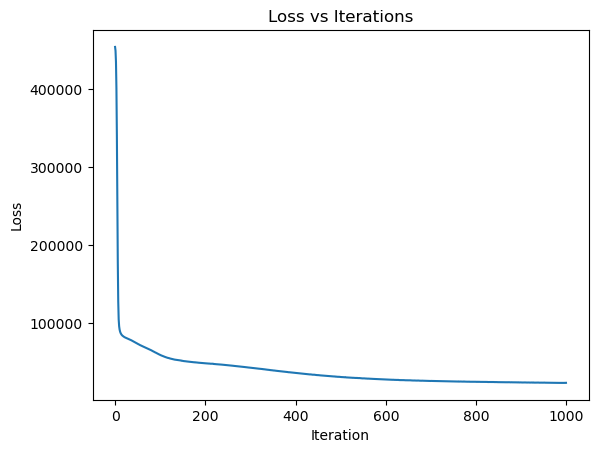

In [15]:
# Plot loss vs iterations to see how many iterations / epochs we should run 

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

losses = []
for epoch in range(1000):
    mlp_regressor.partial_fit(X_train_scaled, y_train)
    loss = mlp_regressor.loss_
    losses.append(loss)
    print(f'Epoch {epoch+1}, Loss: {loss}')

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

In [16]:
# Create an MLPRegressor object with desired parameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0001, 
                              batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                              max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                              warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                              validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                              n_iter_no_change=10, max_fun=15000)

# Train the model on your training data
mlp_regressor.fit(X_train_scaled, y_train)

# Predict using the trained model
predictions = mlp_regressor.predict(X_test_scaled)

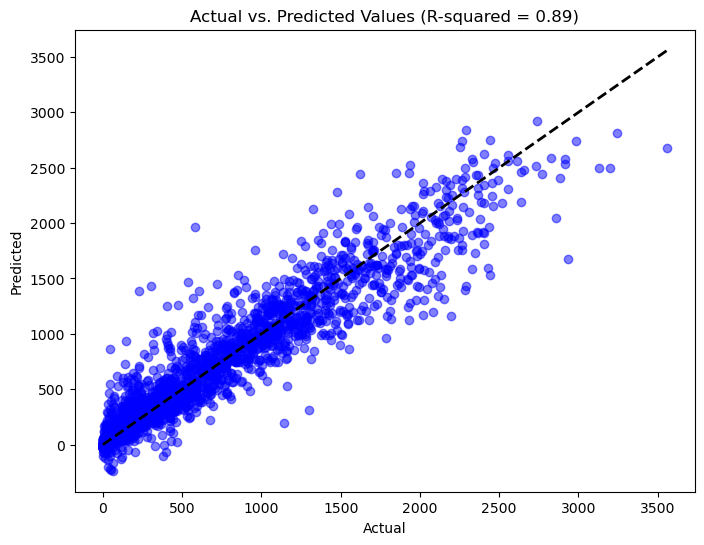

Mean Squared Error (MSE): 47662.49375421286
Mean Absolute Error (MAE): 144.28896218807463
R-squared (R2) Score: 0.8861937523695127


In [21]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (R-squared = {:.2f})'.format(r2))
plt.show()

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

## Model Results
Our MLP regression model was trained to predict the number of bikes rented at a given hour in the city of Seoul using various features extracted from the public bike rental initiative dataset. The features included the hour of the day, temperature, humidity, windspeed, visibility, dewpoint, solar radiation, snowfall, rainfall, and whether it was a functioning bike rental day.

### Model Performance Metrics:

- **Mean Squared Error (MSE):** 47662.49
  - The MSE measures the average squared difference between the predicted and actual number of bike rentals per hour. A lower MSE indicates better performance, although the absolute value of MSE depends on the scale of the target variable.

- **Mean Absolute Error (MAE):** 144.29
  - The MAE represents the average absolute difference between the predicted and actual values. It provides a more interpretable measure of error compared to MSE.

- **R-squared (R2) Score:** 0.886
  - The R2 score quantifies the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, where higher values indicate better fit. An R2 score of 0.886 indicates that our model explains approximately 88.6% of the variance in the number of bike rentals.

### Interpretation:

Our MLP regression model performed well in predicting the number of bike rentals per hour in Seoul. The relatively low MSE and MAE values suggest that the model's predictions are close to the actual values on average. Additionally, the high R2 score of 0.886 indicates that a significant portion of the variance in bike rentals is captured by the model, highlighting its effectiveness in capturing underlying patterns in the data.

Overall, our MLP regression model demonstrates promising performance and can be valuable for forecasting bike rental demand in Seoul, aiding in resource allocation and urban planning efforts.
